In [61]:
# %load 'Pricing American Put Otion'
#!/usr/bin/env python3
"""
Created on Sun Apr 15 12:29:00 2018

@author: Yangfan Cui
"""
import numpy as np
import math
import matplotlib.pyplot as plt

def AmericanOption(M,N):
    '''Assume M and N are integers, length of space and time for mesh,
    return price vector of American put option at initial time, free boundary,
    meshed posible stock price, dx(space mesh size) and dt(time mesh size).
    '''
    sigma = 0.2
    K =100
    r =0.01
    T = 1
    dt = T/N
    B = 200
    dx = B/M
    ### Fill the scheme in matrix
    A = np.zeros((M+1,M+1))
    c = [(0.5*i*r - 0.5*(i**2)*(sigma**2))*dt for i in range(1,M+1)]
    b = [1 + r*dt + (i**2)*(sigma**2)*dt for i in range(0,M+1)]
    a = [( - 0.5*i*r - 0.5*(i**2)*(sigma**2))*dt for i in range(0,M)]
    A = np.diag(c, -1) + np.diag(b, 0) + np.diag(a, 1)
    A[0,0] = 1; A[-1,-1] = 1
    A[0,1] = 0; A[-1,-2] = 0
    
    ### All possible stock price within the bond.
    StockP = np.arange(M+1)*dx
    ### Initialize U at time N: U(T,x) = intinsic value(k-x)+ 
    U = [max(K-i,0) for i in StockP]
    free_boundary = []
    for i in range(N-1,-1,-1):
        U[0] = np.exp(-r*(T-(i+1))*dt)*K
        U[-1] = 0
        new_U = np.linalg.solve(A,U)
        U = np.max([new_U,U],axis=0)
        ### locate the boundary
        free_boundary.append(sum(new_U!=U)) 
    return U,free_boundary,StockP,dx,dt

In [62]:
def free_boundary(x,d):
    '''Assume x is a return object of free_boundary, which
    is a list of boundary location. Transfer it into an arrary
    and multiply with space mesh size to get the price at each 
    time constucting a vector
    '''
    return np.array(x)*d

#### Mesh 1: M = 300, N = 252

In [63]:
test_1 = AmericanOption(300,252)

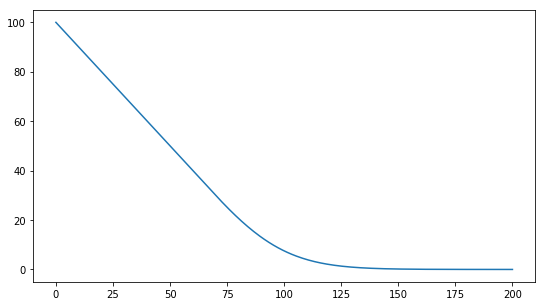

In [64]:
plt.figure(figsize=(9,5))
plt.plot(test_1[2],test_1[0])
plt.show()

In [65]:
f_1 = free_boundary(test_1[1],test_1[3])

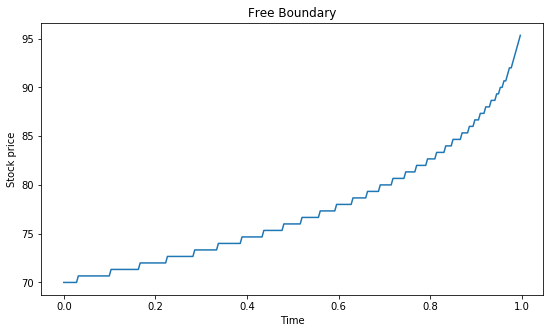

In [66]:
plt.figure(figsize=(9,5))
plt.plot(np.arange(252)*test_1[4],f_1[::-1])
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.title("Free Boundary")
plt.show()

#### Mesh 2: M = 600, N = 504

In [67]:
test_2 = AmericanOption(600,504)

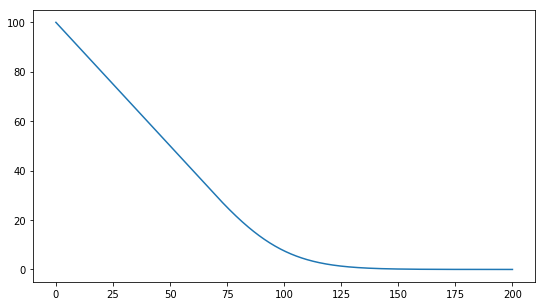

In [68]:
plt.figure(figsize=(9,5))
plt.plot(test_2[2],test_2[0])
plt.show()

In [69]:
f_2 = free_boundary(test_2[1],test_2[3])

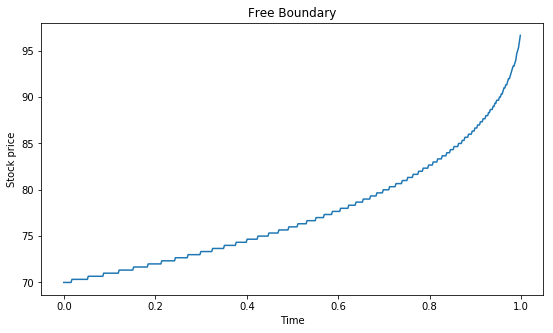

In [70]:
plt.figure(figsize=(9,5))
plt.plot(np.arange(504)*test_2[4],f_2[::-1])
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.title("Free Boundary")
plt.show() 

In [71]:
error_1 = max(abs(test_1[0]-test_2[0][::2]))
print('The maximum error after mesh times 2 is: ',error_1)

The maximum error after mesh times 2 is:  0.00396733568348


#### Mesh 3: M = 1200, N = 1008

In [72]:
test_3 = AmericanOption(1200,1008)

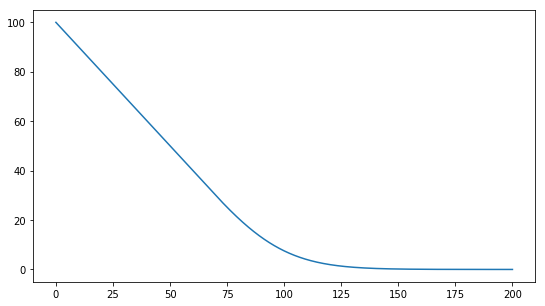

In [73]:
plt.figure(figsize=(9,5))
plt.plot(test_3[2],test_3[0])
plt.show()

In [74]:
f_3 = free_boundary(test_3[1],test_3[3])

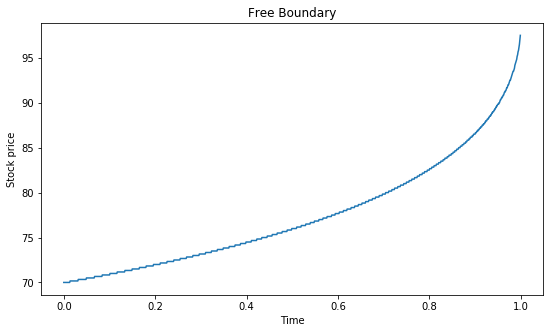

In [75]:
plt.figure(figsize=(9,5))
plt.plot(np.arange(1008)*test_3[4],f_3[::-1])
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.title("Free Boundary")
plt.show() 

In [76]:
error_2 = max(abs(test_2[0]-test_3[0][::2]))
print('The maximum error after mesh times 4 is: ',error_2)

The maximum error after mesh times 4 is:  0.00180929515662


#### Mesh 4: M = 2400, N = 2016

In [77]:
test_4 = AmericanOption(2400,2016)

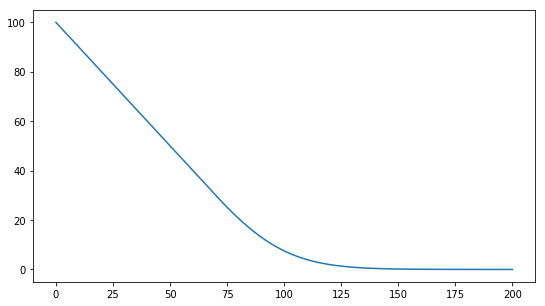

In [78]:
plt.figure(figsize=(9,5))
plt.plot(test_4[2],test_4[0])
plt.show()

In [80]:
f_4 = free_boundary(test_4[1],test_4[3])

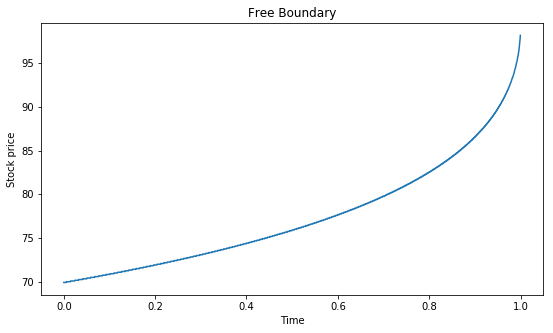

In [81]:
plt.figure(figsize=(9,5))
plt.plot(np.arange(2016)*test_4[4],f_4[::-1])
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.title("Free Boundary")
plt.show()  

In [82]:
error_3 = max(abs(test_3[0]-test_4[0][::2]))
print('The maximum error after mesh times 8 is: ',error_3)

The maximum error after mesh times 8 is:  0.000868079028548


In [83]:
order_1 = math.log(error_2/error_1)/math.log(1/2)
order_2 = math.log(error_3/error_2)/math.log(1/2)
print(order_1,order_2)

1.1327426926726154 1.0595294845790404


#### Table

|Mesh(Time * space)  | Error  |  Order of convergence  |
|:-------------------|-------:|:----------------------:|
|252 * 300           |NA      |    NA                  |
|504 * 600           |0.002898|    NA                  |
|1008 * 1200         |0.001809|    1.13                |
|2016 * 2400         |0.000868|    1.06                |

From the above, we can find out that as mesh mutipies 2 each time, the error is divided by around 2 and order of convergence is around 1 as expected.

At each time, when the stock price meet the free boundary, an exercise should be happened, otherwise, it shold be continueous.